## Telecom Churn - Group Case Study

#### Overview of the business issue

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn

For this project, you will use the **usage-based** definition to define churn.

Customers that have not made any calls, used the internet, or made any other outgoing or incoming usage over a period of time (usage-based churn).

This definition may have the drawback that it may be too late to take corrective measures to retain the client once they have stopped utilising the services for a period. For instance, if you define churn based on a "two-months zero usage" term, projecting attrition may be pointless because the client will have already migrated to another operator by then.

###### business objective:

Using the data (features) from the first three months, the business goal is to estimate the churn in the most recent (i.e., ninth) month. Understanding the normal consumer behaviour during churn will help with this endeavour.

#### Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Filename:** telecom_churn_data.csv

In [1]:
# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

# Import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#To read file in google collab
#from google.colab import files
#uploaded = files.upload()

In [3]:
import io
#telecom = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
tel = pd.read_csv('telecom_churn_data.csv')

In [4]:
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Total customers
print("Unique customers/MSISDN in the data: %d"%len(tel.mobile_number.unique()))

Unique customers/MSISDN in the data: 99999


In [7]:
#list of columns/features
pd.DataFrame(tel.columns)

,0
0,mobile_number
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
...,...
221,aon
222,aug_vbc_3g
223,jul_vbc_3g
224,jun_vbc_3g


## Data Cleaning


In [8]:
#Missing value percentage in the features
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
tot_missing.sort_values(ascending= False)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
                            ... 
last_day_rch_amt_6           0.0
last_day_rch_amt_7           0.0
last_day_rch_amt_8           0.0
last_day_rch_amt_9           0.0
mobile_number                0.0
Length: 226, dtype: float64

In [9]:
#Features having more than 50% missing values
len(tot_missing.loc[tot_missing > 50])

40

In [10]:
#Name of the 40 columns which have more than 50% missing values
tot_missing.sort_values(ascending= False).head(40)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

As can be seen, several of these qualities are crucial for analysis and must not be disregarded. As a result, we must analyse them and assign missing values. These features appear to have no values for the customers and can be assumed to have a value of 0.

In [11]:
drCol = ['fb_user','night_pck_user']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in drCol]:
   tel.drop([col],axis =1 ,inplace=True)

In [12]:
# Since av_rech_amt_data_* features are important for getting the high-value customers,
#lets impute the missing av_rech_amt_data_* with 0
imCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in imCol]:
  tel[col].fillna(0, inplace=True)

In [13]:
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 50])

4

Currently, four of our features have missing values that total more than 50%.
Since they are not very significant for analysis purposes, we can disregard them.

In [14]:
tot_missing.sort_values(ascending=False).head(4)

date_of_last_rech_data_6    75.0
date_of_last_rech_data_9    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_7    74.0
dtype: float64

In [15]:
#date_of_last_rech_data_6 , date_of_last_rech_data_7, date_of_last_rech_data_8, date_of_last_rech_data_9
misscol = [ 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
tel.drop(misscol, axis = 1,inplace= True)
tel.shape

(99999, 214)

In [16]:
#Missing values more than 5%
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 5])

29

29 of our characteristics have missing data that are greater than 5%.
Let's look at the names of the features.

In [17]:
tot_missing.sort_values(ascending=False).head(29)

loc_og_t2f_mou_9    8.0
std_ic_t2t_mou_9    8.0
offnet_mou_9        8.0
loc_ic_mou_9        8.0
roam_ic_mou_9       8.0
std_og_t2m_mou_9    8.0
roam_og_mou_9       8.0
std_ic_t2o_mou_9    8.0
loc_og_t2t_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2t_mou_9    8.0
spl_og_mou_9        8.0
loc_og_t2m_mou_9    8.0
loc_og_mou_9        8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_mou_9        8.0
loc_og_t2c_mou_9    8.0
onnet_mou_9         8.0
isd_og_mou_9        8.0
isd_ic_mou_9        8.0
spl_ic_mou_9        8.0
ic_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
std_og_mou_9        8.0
std_og_t2c_mou_9    8.0
og_others_9         8.0
loc_ic_t2f_mou_9    8.0
dtype: float64

As can be seen, all of these features are associated with the ' 9', which stands for the customer's 9th month of data. We must determine whether the same customers' data is absent across all columns.

In [18]:
misscol =['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9']
tel[tel[misscol].isnull().all(axis=1)][misscol].head()

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
tel[tel[misscol].isnull().all(axis=1)][misscol]

,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,...,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It appears that for 7745 Customers, each of these characteristics is worthless and empty. We have the option to also impute these values with 0.

In [20]:
for col in [y for y in misscol]:
    tel[col].fillna(0, inplace=True)

In [21]:
tel=tel[~tel[misscol].isnull().all(axis=1)]
tel.shape

(99999, 214)

In [22]:
#Missing values more than 2%
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 2])

89

In [23]:
tot_missing.sort_values(ascending=False).head(89)

og_others_8         5.0
std_ic_t2o_mou_8    5.0
isd_og_mou_8        5.0
loc_og_t2f_mou_8    5.0
ic_others_8         5.0
                   ... 
loc_og_mou_7        4.0
std_og_t2f_mou_6    4.0
std_og_t2t_mou_6    4.0
std_og_t2m_mou_7    4.0
std_og_t2t_mou_7    4.0
Length: 89, dtype: float64

These features all have 5 missing values, or 4% of them. Check to see if these have any common rows.

In [24]:
misscol = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'date_of_last_rech_8', 'date_of_last_rech_9']
tel[tel[misscol].isnull().all(axis=1)][misscol].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
tel[tel[misscol].isnull().all(axis=1)][misscol]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,date_of_last_rech_8,date_of_last_rech_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There appear to be 381 customers for whom all of these things are worthless. Let's remove these clients from the database.

In [26]:
tel=tel[~tel[misscol].isnull().all(axis=1)]
tel.shape

(99618, 214)

In [27]:
# For other customers where these missing values are spread out, let's impute them with zero. 

misscol.remove('date_of_last_rech_8')
misscol.remove('date_of_last_rech_9')
for col in [y for y in misscol]:
    tel[col].fillna(0, inplace=True)

In [28]:
#Missing values
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 0])

9

we have 9 features which still have missing values

In [29]:
tot_missing.sort_values(ascending=False).head(9)

date_of_last_rech_9     4.0
date_of_last_rech_8     3.0
loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_7     1.0
date_of_last_rech_6     1.0
dtype: float64

In [30]:
#Let's the values in these columns
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,tel[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [31]:
#Some of these features take only one value. So we can  impute their missing values in these features with the mode
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(tel[c].value_counts())
    tel[c].fillna(tel[c].mode()[0], inplace=True)

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98867
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [32]:
#Missing values
tot = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 0])

9

In [33]:
tot_missing.sort_values(ascending=False).head(4)

date_of_last_rech_9    4.0
date_of_last_rech_8    3.0
loc_og_t2o_mou         1.0
std_og_t2o_mou         1.0
dtype: float64

We can substitute the last day of that month for the missing values in the features that show the most recent recharge date.

In [34]:
tel['date_of_last_rech_6'].fillna('6/30/2014', inplace = True)
tel['date_of_last_rech_7'].fillna('7/31/2014', inplace = True)
tel['date_of_last_rech_8'].fillna('8/31/2014', inplace = True)
tel['date_of_last_rech_9'].fillna('9/30/2014', inplace = True)

In [35]:
#Missing values
tot_missing = round(100*(tel.isnull().sum()/tel.shape[0]))
len(tot_missing.loc[tot_missing > 0])

0

In [36]:
#Let's look for columns having all values as 0

cols_as_zero=tel.columns[(tel == 0).all()]
cols_as_zero

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [37]:
# Since all of the aforementioned columns have values of 0, we may remove them.

tel.drop(cols_as_zero,axis=1,inplace=True)

### Let's calculate the percentage of data left after treating the missing values.

In [38]:
print("Percentage of data remaining after treating missing values: {}%".format(round(tel.shape[0]/99999 *100,2)))
print ("Number of users: {}".format(tel.shape[0]))
print ("Number of features: {}".format(tel.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of users: 99618
Number of features: 203


In [39]:
#Let's look at the datatypes of the columns

tel.reset_index(inplace=True,drop=True)
# list of all columns which store date
date_cols = list(tel.filter(regex='date').columns)
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [40]:
# Let's converting datatype of date columns to datetime
for col in date_cols:
    tel[col] = pd.to_datetime(tel[col], format='%m/%d/%Y')

In [41]:
tel['last_date_of_month_6'].unique()

array(['2014-06-30T00:00:00.000000000'], dtype='datetime64[ns]')

### The month's most recent date is not necessary. These columns can be taken down.

In [42]:
tel.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'last_date_of_month_9',], axis =1, inplace = True)

In [43]:
#Checking the datatypes (datetime/float/int)
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99618 entries, 0 to 99617
Columns: 199 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(160), int64(35)
memory usage: 151.2 MB


In [44]:
tel.columns

Index(['mobile_number', 'circle_id', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=199)

#### There are certain monthly variables (_6,_7,_8,_9) that don't have the usual names.

Let's make them consistent with the data.

In [45]:
#We don't need the complete date, so we can replace it witht the Day only
tel['date_of_last_rech_6'] = pd.to_datetime(tel.date_of_last_rech_6).dt.day
tel['date_of_last_rech_7'] = pd.to_datetime(tel.date_of_last_rech_7).dt.day
tel['date_of_last_rech_8'] = pd.to_datetime(tel.date_of_last_rech_8).dt.day

## Let's Filter high-value customers

We simply need to forecast turnover for high-value clients, as was already mentioned. As an example of a high-value client, consider: who have recharged for an amount greater than or equal to X, where X is the 70th percentile of the typical recharge amount for the first two months (the good phase).

In [46]:
reccol = tel.filter(regex=('count')).columns
tel[reccol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create derived columns now.

The Derived Column assists in both better representing the data and working on model construction.

In [47]:
#'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9' :- 
#For these we can use the 2G + 3G data combined

for i in range(6,10):
    tel['vol_data_mb_'+str(i)] = (tel['vol_2g_mb_'+str(i)]+tel['vol_3g_mb_'+str(i)]).astype(int)

In [48]:
drCol = ['vol_2g_mb','vol_3g_mb']
for col in [y + s for s in ['_6','_7','_8',] for y in drCol]:
   tel.drop([col],axis =1 ,inplace=True)

In [49]:
#avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

#These will store the average recharge value for each customer for every month
for i in range(6,10):
    tel['avg_rech_amt_'+str(i)] = round(tel['total_rech_amt_'+str(i)]/tel['total_rech_num_'+str(i)]+1,2)

In [50]:
#total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

#These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month

for i in range(6,10):
    tel['total_rech_num_data_'+str(i)] = (tel['count_rech_2g_'+str(i)]+tel['count_rech_3g_'+str(i)]).astype(int)

In [51]:
drCol = ['count_rech_2g','count_rech_3g']
for col in [y + s for s in ['_6','_7','_8','_9'] for y in drCol]:
   tel.drop([col],axis =1 ,inplace=True)

In [52]:
#total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

#These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

for i in range(6,10):
    tel['total_rech_amt_data_'+str(i)] = tel['total_rech_num_data_'+str(i)]*tel['av_rech_amt_data_'+str(i)]

In [53]:
#total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

#These will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

for i in range(6,10):
    tel['total_month_rech_'+str(i)] = tel['total_rech_amt_'+str(i)]+tel['total_rech_amt_data_'+str(i)]
tel.filter(regex=('total_month_rech')).head()

,total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9
0,614.0,504.0,504.0,0.0
1,74.0,538.0,383.0,121.0
2,168.0,315.0,116.0,404.0
3,230.0,310.0,601.0,410.0
4,252.0,350.0,287.0,200.0


In [54]:
# Let's check the mean of first two months (good phase) total monthly recharge amount
gdPhase_mean =(tel.total_month_rech_6 + tel.total_month_rech_7)/2
# looking the cutoff which is the 70th percentile of the good phase mean recharge amounts
hv_cutoff= np.percentile(gdPhase_mean,70)

In [55]:
# Let's filter the users whose good phase mean recharge amount >= to the cutoff of 70th percentile.
hv_users = tel[gdPhase_mean >=  hv_cutoff]
hv_users.reset_index(inplace=True,drop=True)

print("No. of High-Value users: %d\n" % len(hv_users))
print("% of High-value users : {}%".format(round(len(hv_users)/tel.shape[0]*100),2))

No. of High-Value users: 29906

% of High-value users : 30%


##### Tagging the Churners
Let's now categorise the customers who have left (churn=1, else 0) based on the fourth month as follows:

Those who are in the churn phase but have not made any calls (incoming or outgoing) OR even accessed mobile internet once. To identify churners, we must use the following attributes:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [56]:
churnPhaseMon=9
churn_fts= ['vol_2g_mb_','vol_3g_mb_','total_ic_mou_','total_og_mou_']
flag = ~hv_users[[s + str(churnPhaseMon) for s in churn_fts ]].any(axis=1)
flag = flag.map({True:1, False:0})

In [57]:
hv_users['churn'] = flag
print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(hv_users[hv_users.churn == 1]),hv_users.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(hv_users[hv_users.churn == 1])/hv_users.shape[0] *100,2)))


There are 2418 users tagged as churners out of 29906 High-Value Customers.
High-value Churn Percentage : 8.09%


- We can observe from the aforementioned figures that there are only **8.09% churn** cases.
- This demonstrates unequivocally that the dataset is **highly imbalanced**, with churn instances constituting the minority (8.14%), while non-churners constitute the majority (91.91)

In [58]:
# Lets remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).
col_9List = hv_users.filter(regex=('_9')).columns
hv_users.drop(col_9List,axis=1,inplace=True)

#### Outlier Treatment


In [59]:
hv_users.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,2.990600e+04,29906.0,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,...,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000,29906.000000
mean,7.001206e+09,109.0,558.806269,561.616785,509.247607,261.171296,268.288923,234.500335,374.178469,378.617878,...,1.671404,1.857453,1.624189,456.901584,529.614264,464.170286,1118.175676,1191.074473,1049.299491,0.080853
std,6.907405e+05,0.0,460.374956,480.202624,502.346776,460.136333,480.586917,458.952539,482.957035,499.398782,...,2.834520,3.095381,2.999321,1420.718202,1478.150374,1625.036120,1568.077084,1634.175261,1806.779214,0.272614
min,7.000000e+09,109.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000026e+09,109.0,1.098500,1.324000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000251e+09,109.0,171.863500,178.390500,84.817000,0.730000,0.585000,0.000000,11.385000,10.635000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,376.000000,383.000000,103.500000,0.000000
25%,7.000609e+09,109.0,310.568500,310.641000,231.802000,17.160000,16.045000,10.510000,71.730000,70.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,547.000000,552.000000,396.000000,0.000000
50%,7.001203e+09,109.0,482.619000,481.813000,427.616000,84.780000,82.890000,65.730000,222.860000,220.300000,...,1.000000,1.000000,1.000000,92.000000,101.000000,25.000000,789.000000,815.000000,690.000000,0.000000
75%,7.001803e+09,109.0,700.290750,699.132750,662.286750,290.895000,290.755000,240.710000,488.307500,494.437500,...,2.000000,2.000000,2.000000,400.000000,575.000000,308.000000,1210.000000,1271.000000,1154.000000,0.000000
90%,7.002165e+09,109.0,994.248000,996.535000,978.198000,755.860000,785.320000,666.740000,897.260000,917.595000,...,5.000000,5.000000,5.000000,1128.000000,1374.000000,1088.000000,2015.000000,2182.000000,2040.000000,0.000000


- As can be seen, there is an outlier.
Data can be kept in the 0.01 to 0.99 percentile range.

In [60]:
con_cols = [col for col in hv_users.columns if col not in ['churn','mobile_number']]

for col in con_cols:
    percentiles = hv_users[col].quantile([0.01,0.99]).values
    hv_users[col][tel[col] <= percentiles[0]] = percentiles[0]
    hv_users[col][tel[col] >= percentiles[1]] = percentiles[1]

In [61]:
hv_users.shape

(29906, 155)

### Correlation Analysis

- To manage the multicollinearity PCA for feature selection in our initial model.
- To overcome the multicoliniarity in the second model, we will use PCA with Random Forest.

### Derived features
#### It is evident from the correlation heatmap that no single parameter can fully account for the variation in the tragedy variable. Therefore, we must come up with some features that can account for the target variable.

- It is evident from the data that internet usage increases when a customer is about to churn. We can make use of internet usage median.
- It was found that the churn was lower the longer the tenure, so we can create buckets from this characteristic.

In [62]:
hv_users['int_usage_median'] = hv_users[['vol_data_mb_6','vol_data_mb_7','vol_data_mb_8']].median(axis=1)
hv_users['int_usage_median'] = hv_users.int_usage_median.map(lambda x: 1 if x == 0 else 0)

hv_users['tenure_buck'] = np.round(hv_users['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
hv_users['tenure_buck'] = pd.cut(hv_users['tenure_buck'], bins)
hv_users['tenure_buck'].value_counts()

(4, 10]    9115
(1, 2]     7595
(0, 1]     5927
(2, 3]     4381
(3, 4]     2825
Name: tenure_buck, dtype: int64

In [63]:
#We have some features which have almost zero variance. Let's remove them.
hv_users = hv_users.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon',
                                'circle_id',], 1)

In [64]:
hv_users.shape

(29906, 150)

In [65]:
tot_missing = round(100*(hv_users.isnull().sum()/hv_users.shape[0]))
len(tot_missing.loc[tot_missing > 0])

1

In [66]:
tot_missing.sort_values(ascending=False).head(4)

avg_rech_amt_8    2.0
tenure_buck       0.0
spl_og_mou_6      0.0
total_og_mou_8    0.0
dtype: float64

- Here, a derived feature has 2% of its values missing. We can eliminate the rows as it's not practical to impute the missing value in a derived column

In [67]:
hv_users.dropna(axis = 0, how = 'any', inplace = True)

In [68]:
tot_missing = round(100*(hv_users.isnull().sum()/hv_users.shape[0]))
len(tot_missing.loc[tot_missing > 0])

0

In [69]:
hv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 150 entries, mobile_number to tenure_buck
dtypes: category(1), float64(118), int32(3), int64(28)
memory usage: 33.2 MB


[Text(0, 0.5, '(%)')]

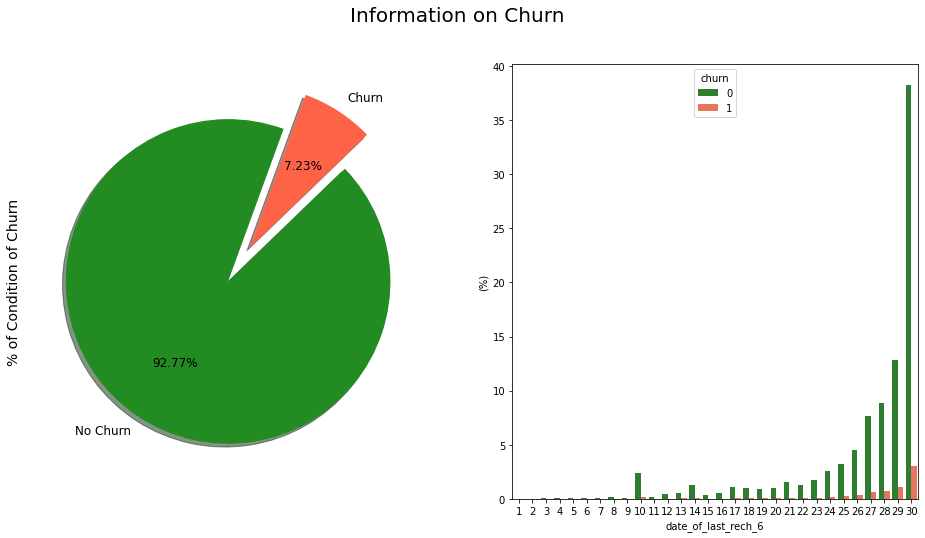

In [70]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
hv_users["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=hv_users, palette=palette, estimator=lambda x: len(x) / len(hv_users) * 100)
ax[1].set(ylabel="(%)")

**The ratio of "possible churn customers" to "non-churn customers" is depicted in the above graph.**

**Additionally, the days that have the biggest impact are at the end of the month.**

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

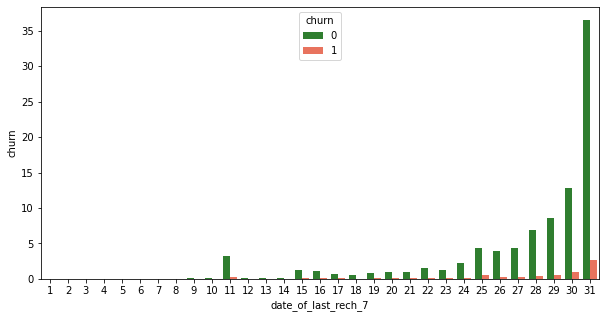

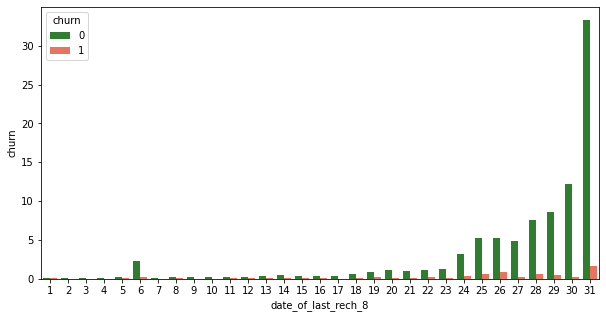

In [71]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=hv_users, palette=palette, 
            estimator=lambda x: len(x) / len(hv_users) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=hv_users, palette=palette, 
            estimator=lambda x: len(x) / len(hv_users) * 100)

**According to the two graphs above, the majority of recharges for the seventh and eighth months are made in the final days of the month.**

In [72]:
hv_users.shape

(29238, 150)

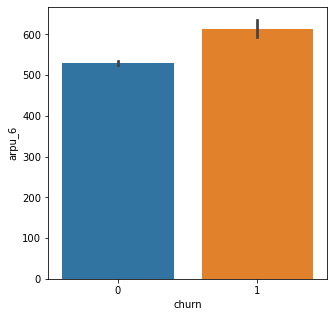

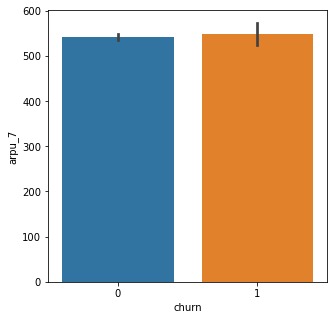

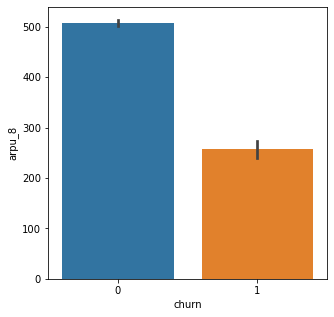

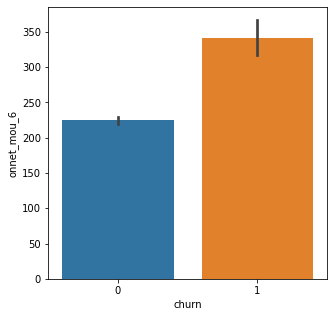

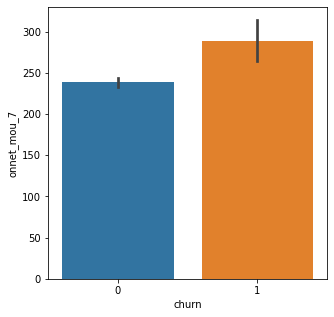

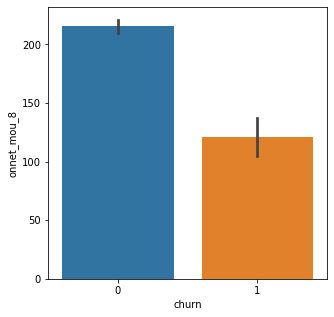

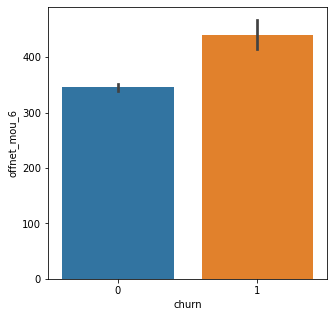

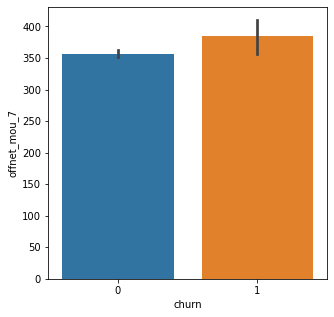

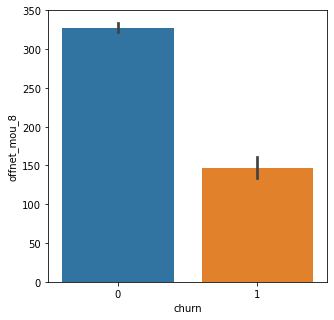

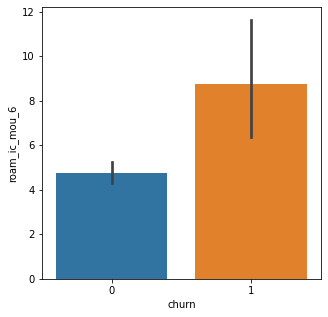

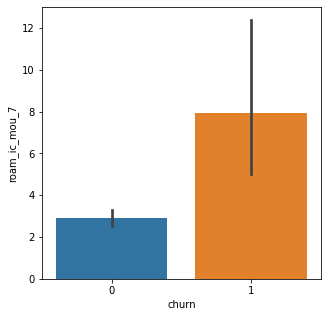

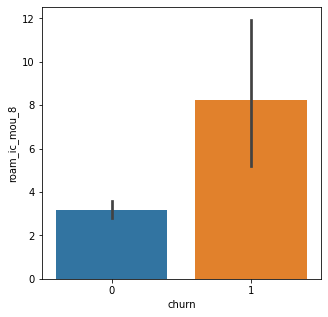

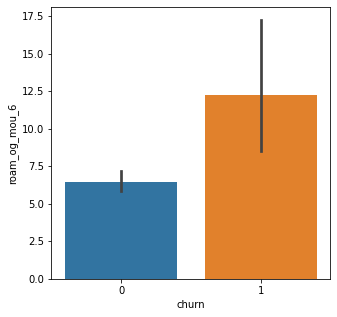

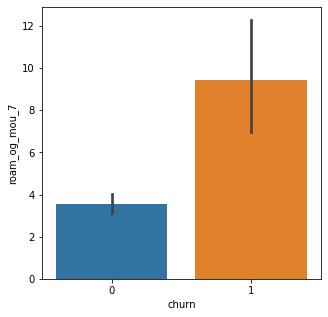

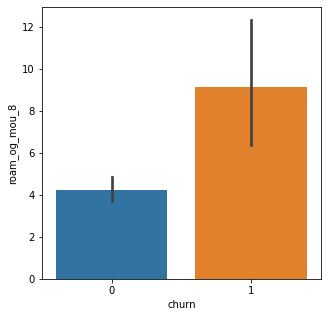

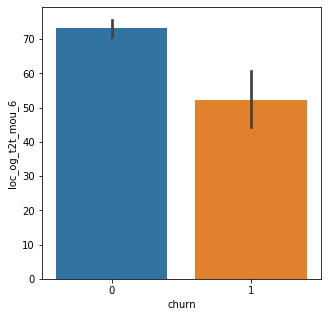

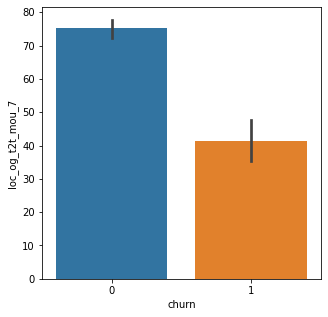

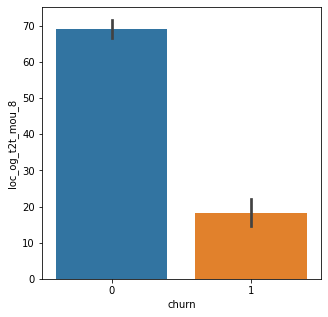

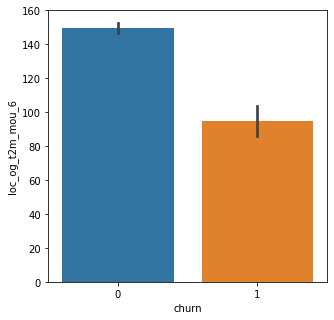

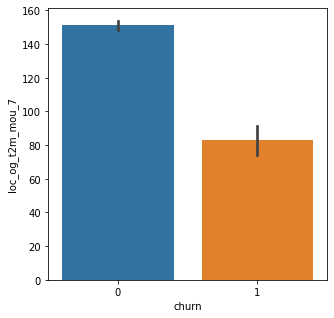

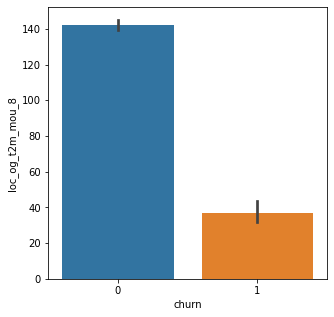

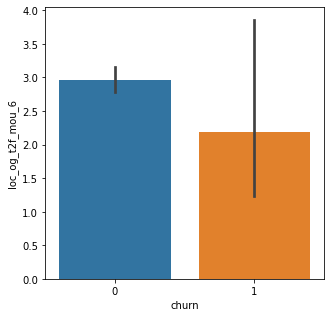

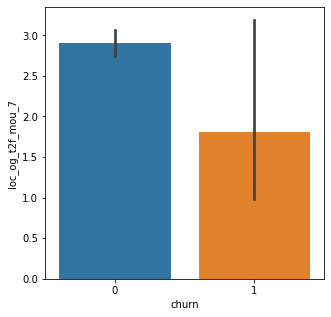

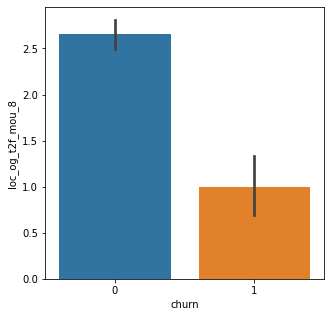

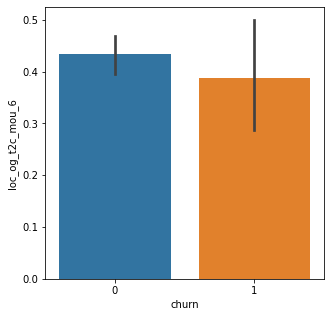

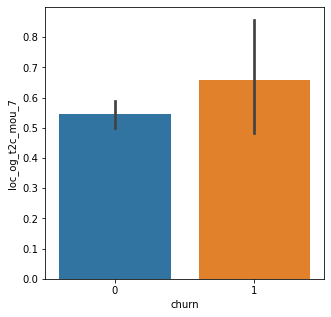

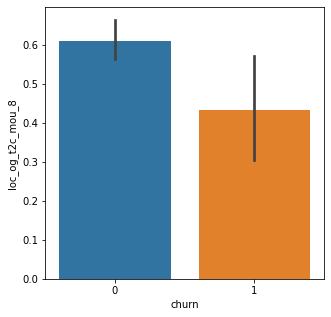

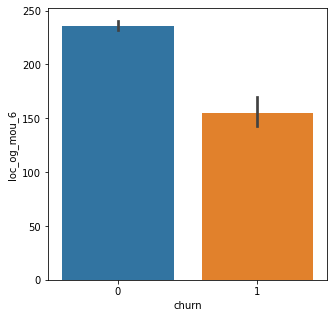

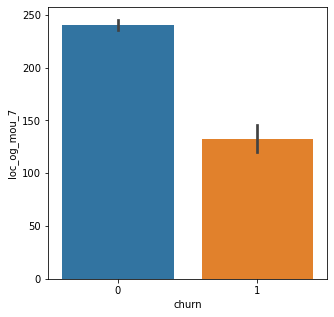

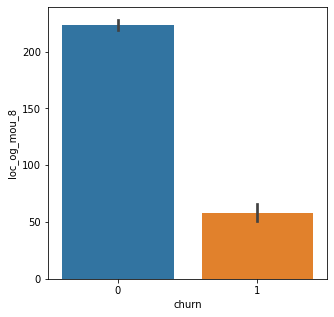

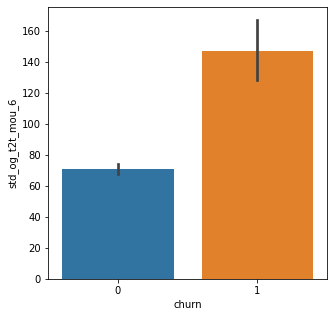

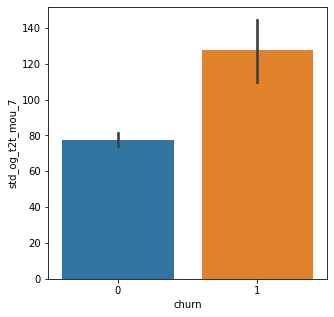

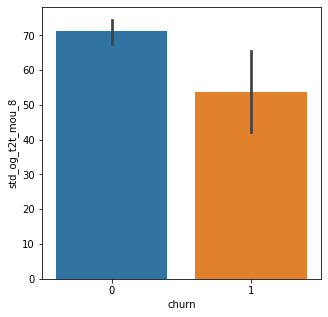

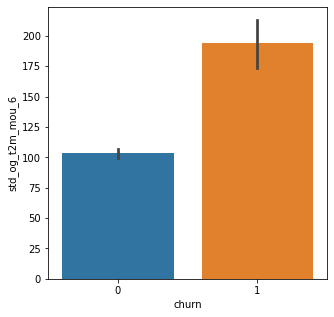

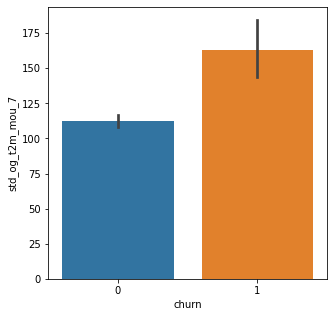

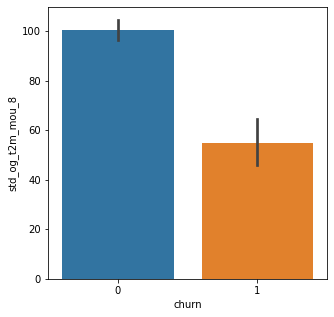

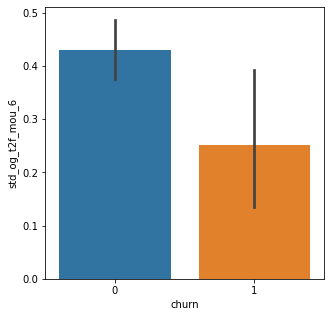

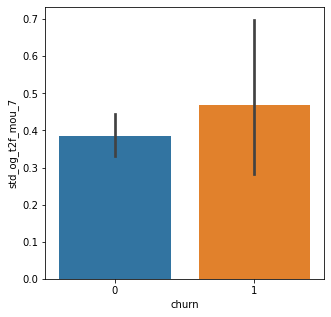

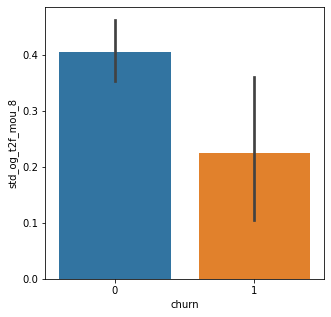

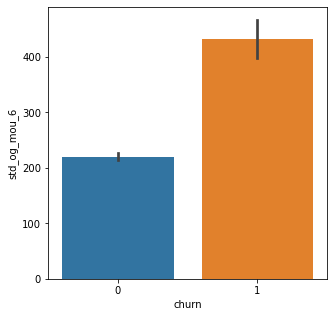

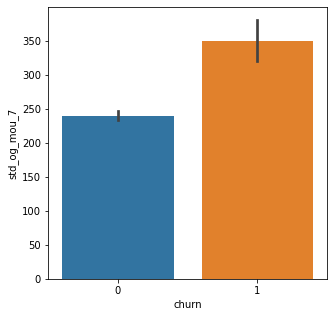

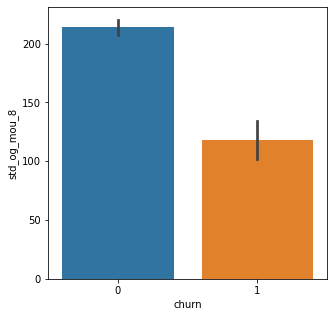

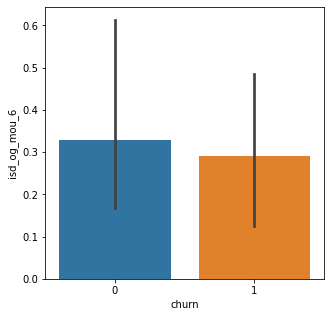

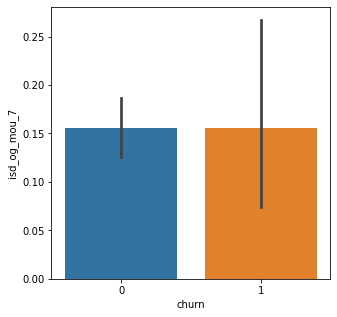

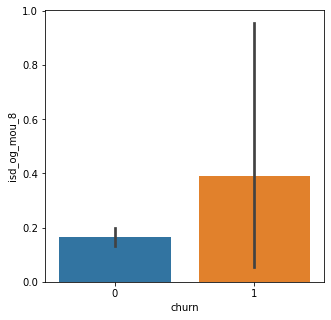

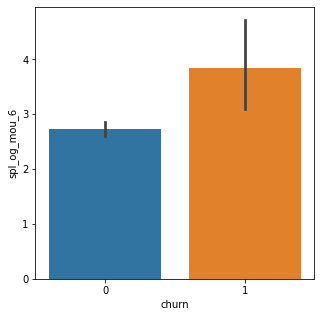

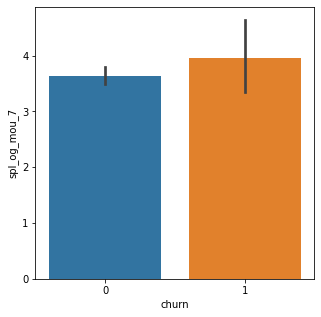

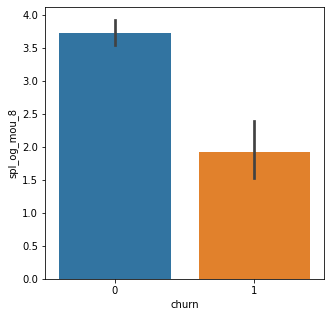

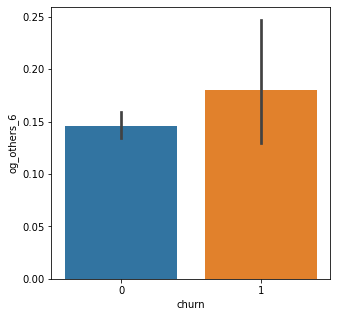

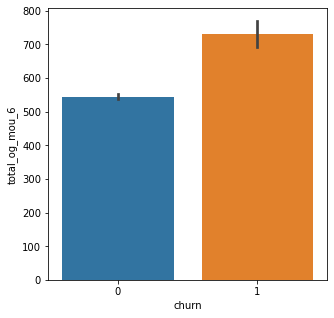

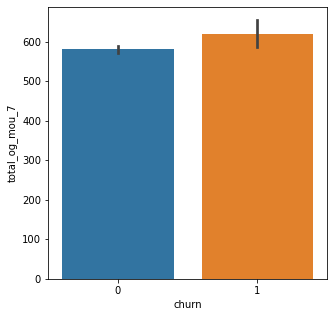

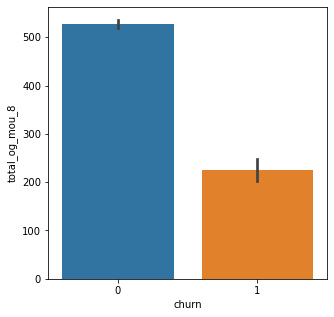

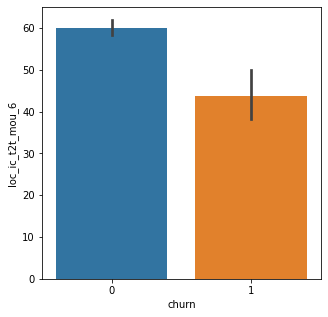

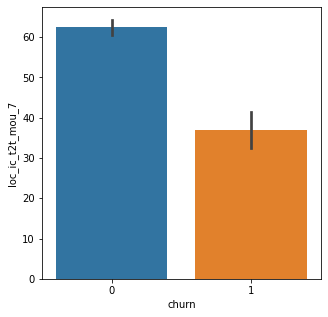

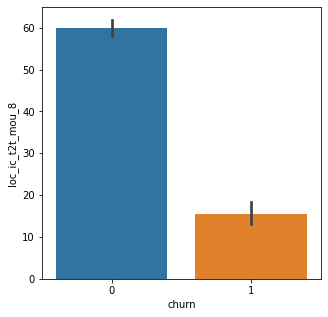

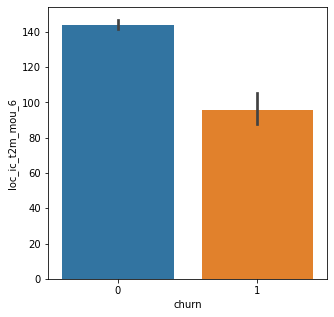

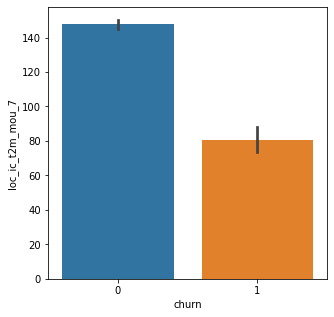

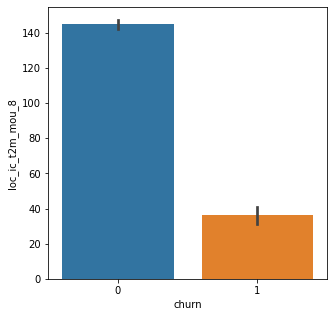

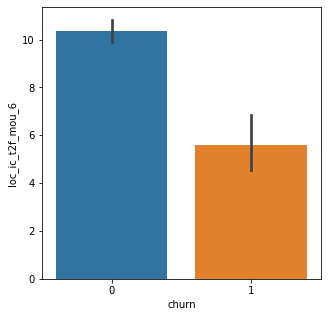

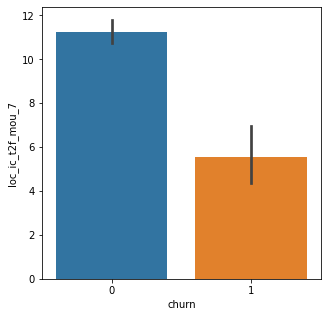

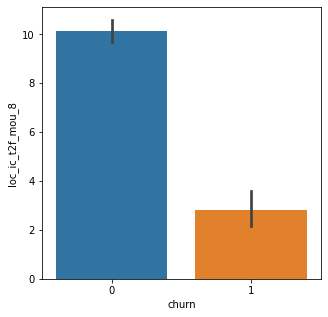

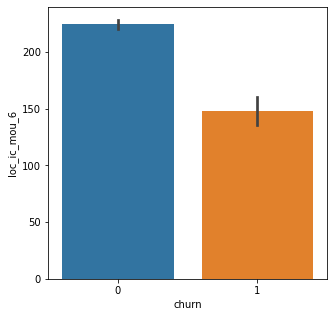

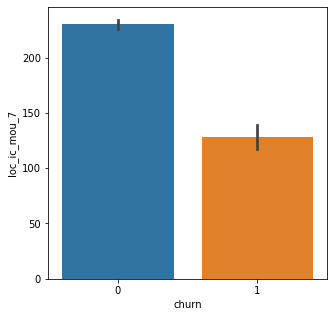

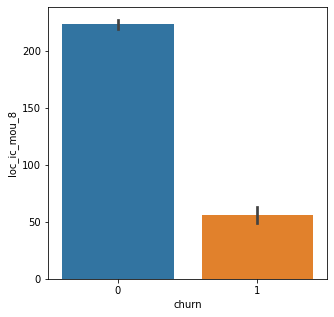

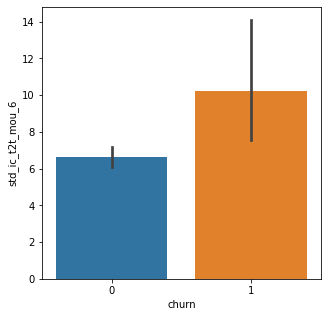

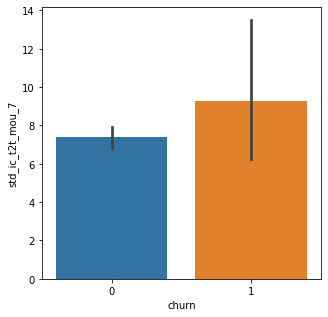

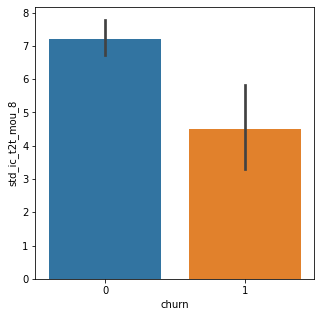

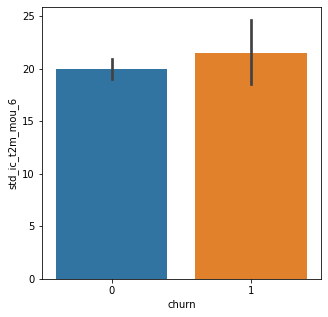

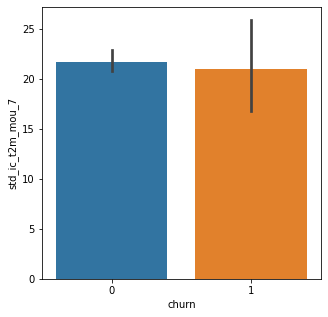

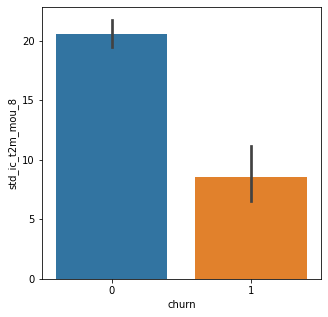

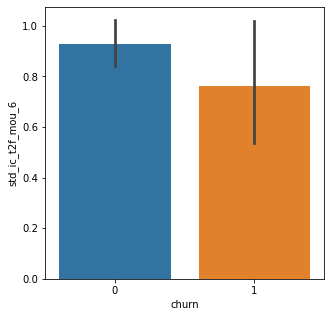

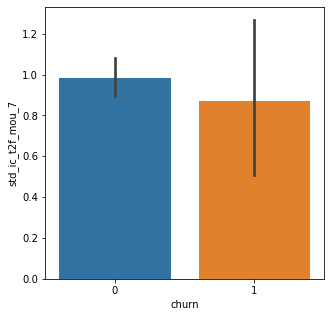

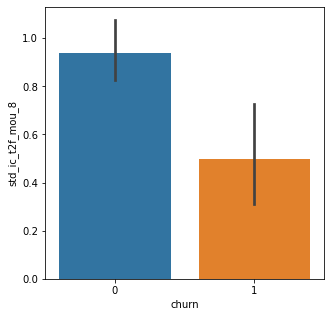

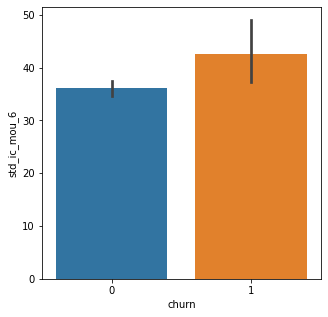

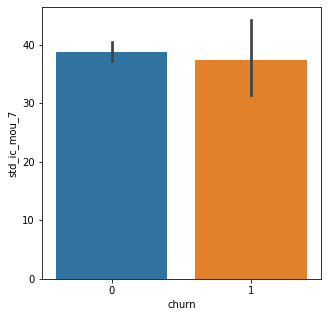

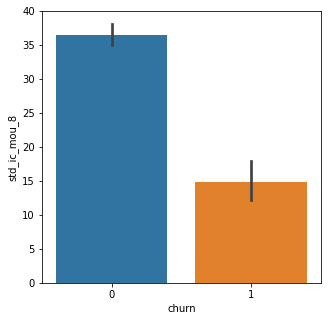

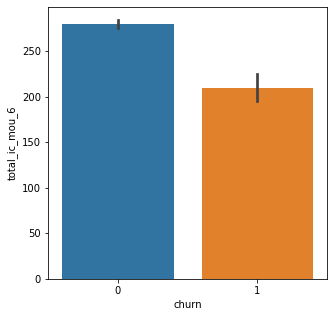

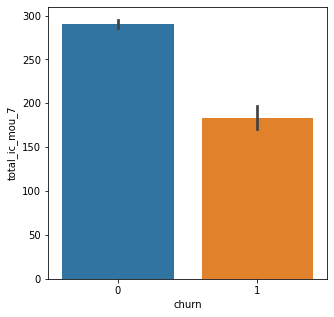

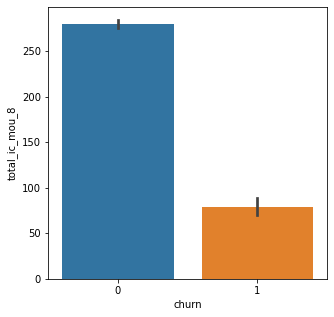

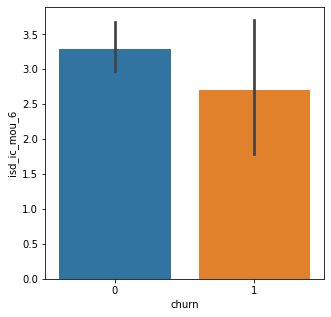

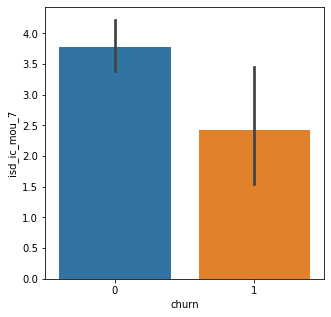

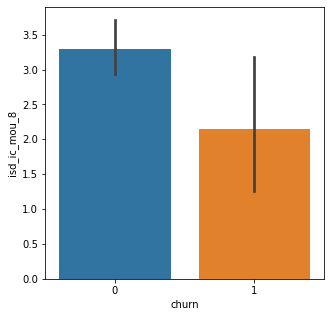

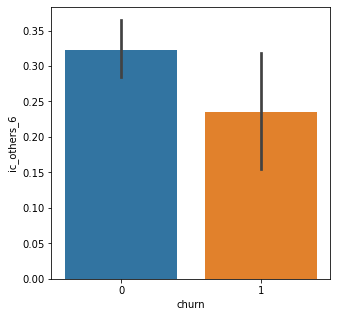

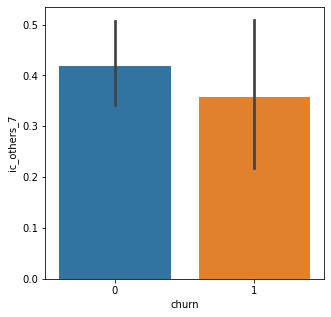

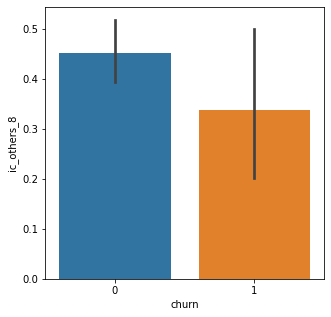

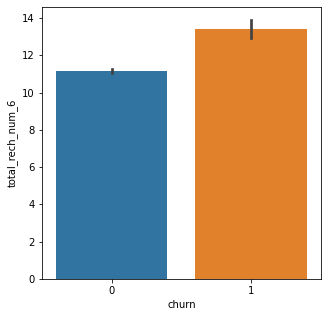

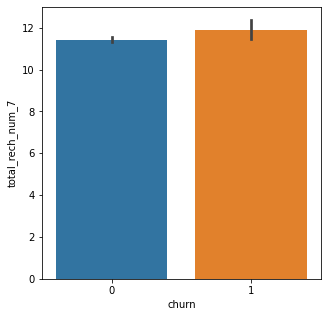

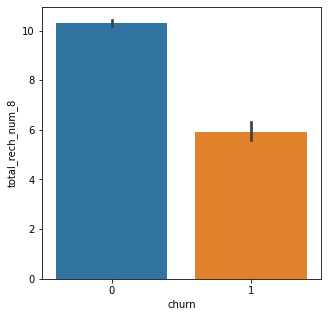

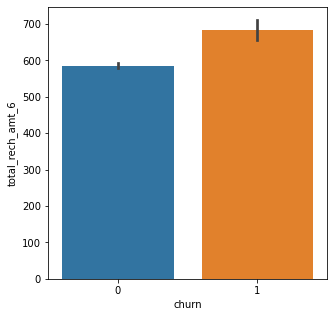

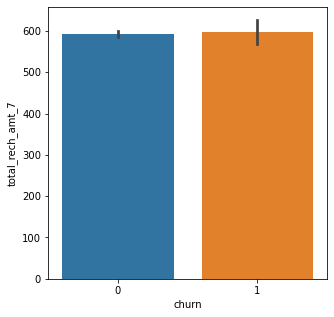

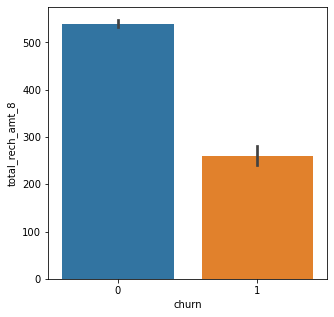

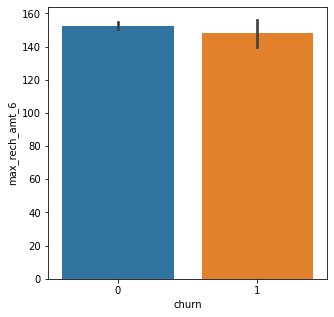

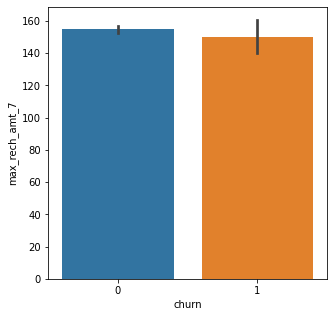

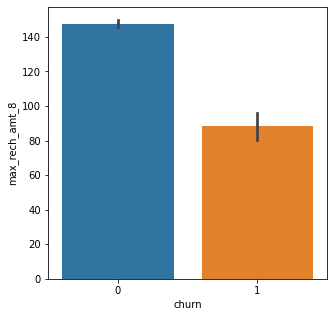

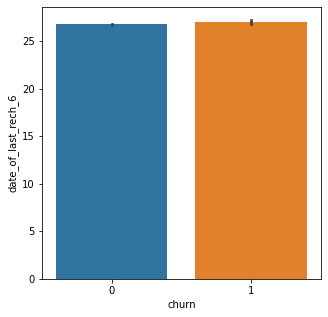

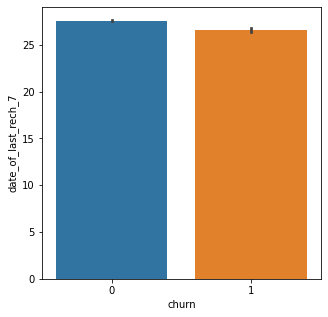

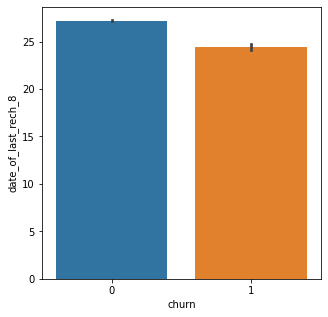

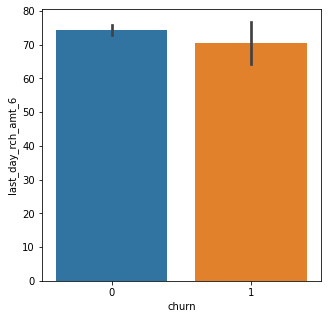

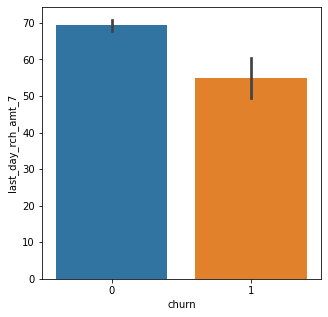

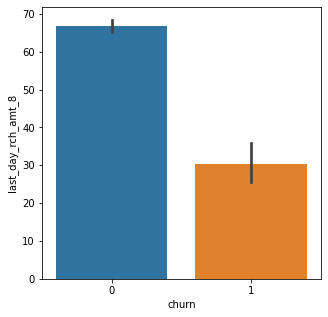

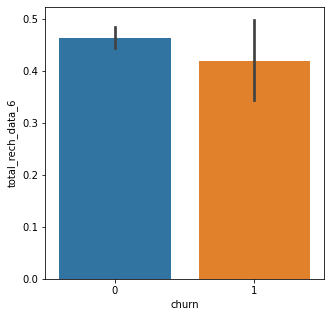

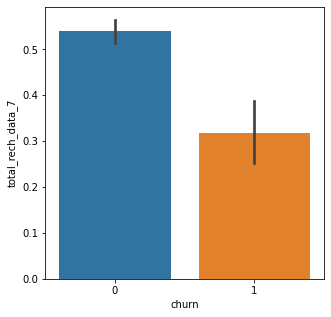

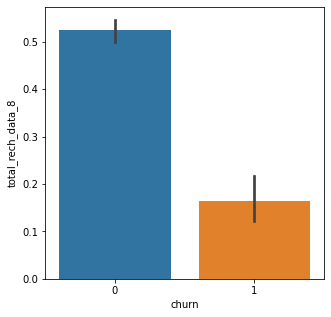

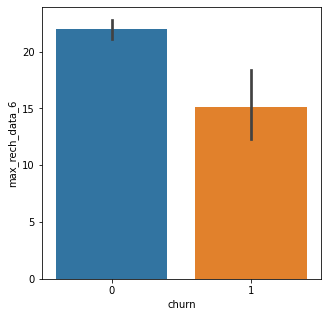

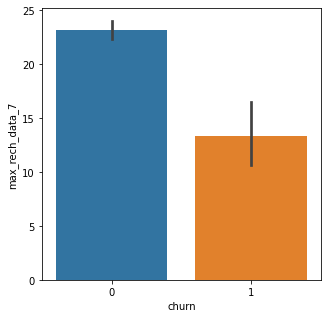

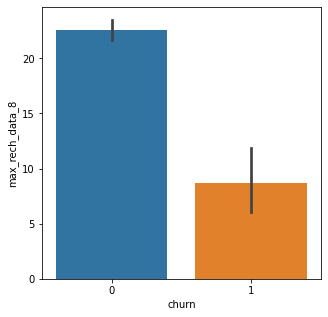

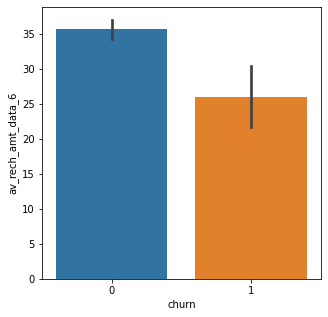

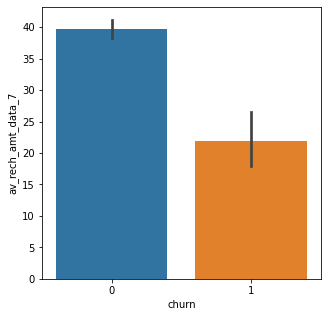

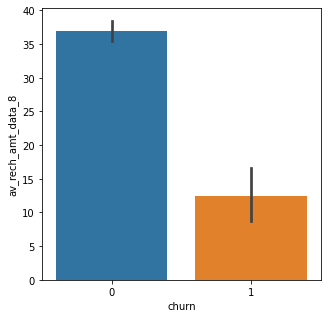

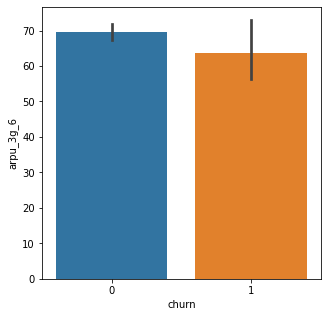

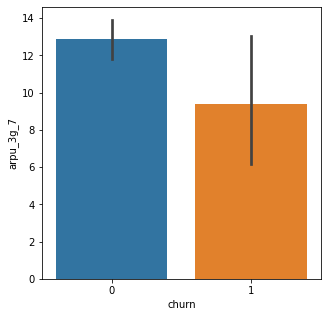

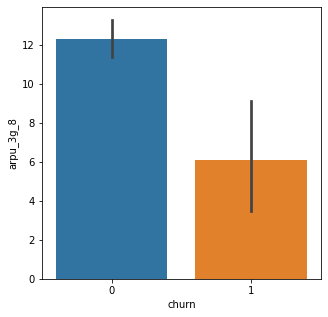

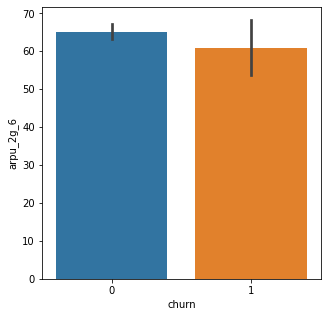

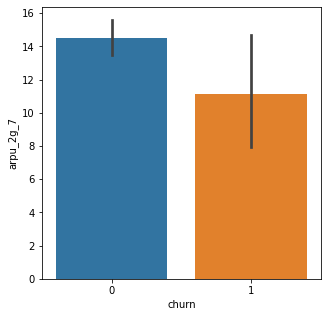

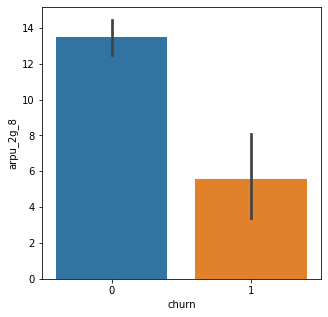

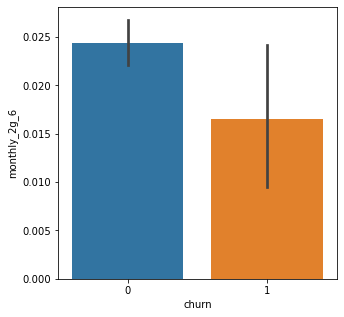

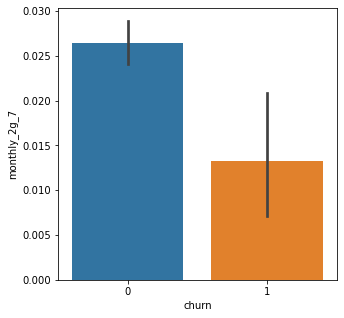

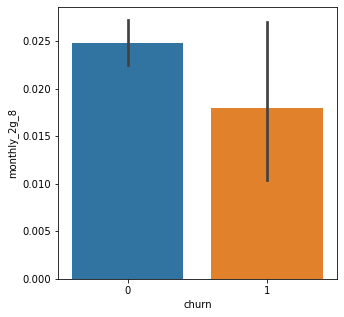

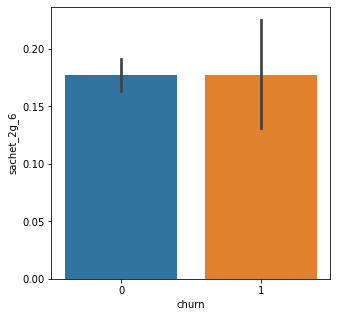

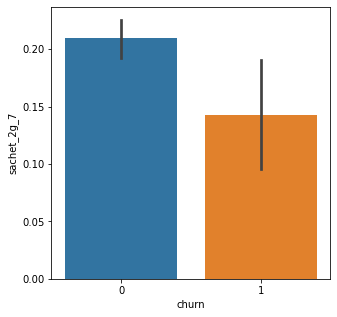

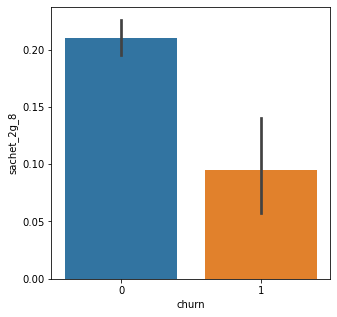

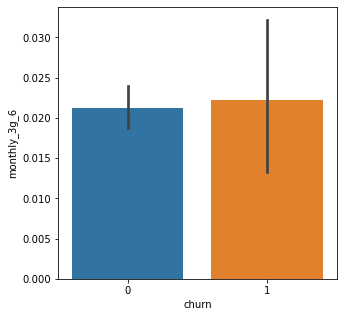

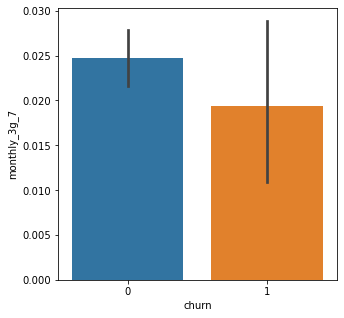

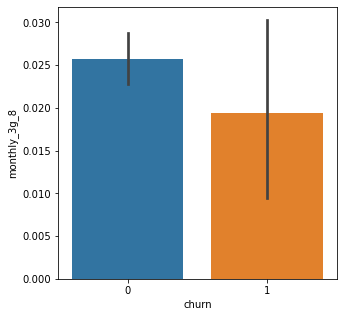

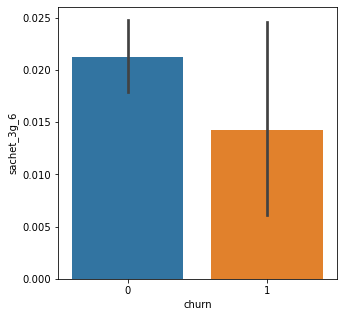

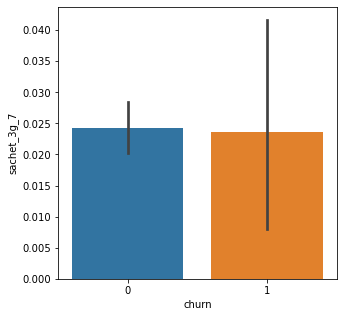

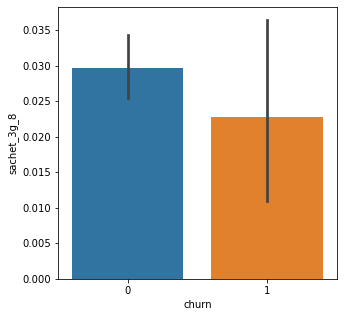

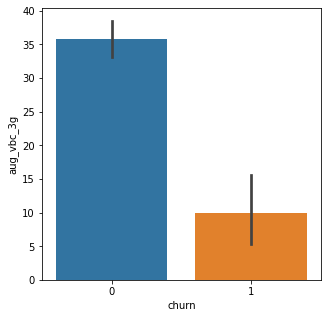

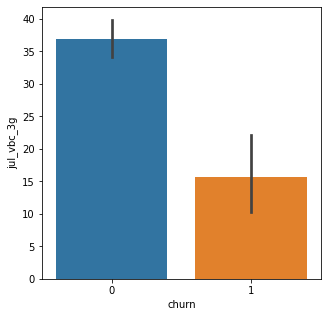

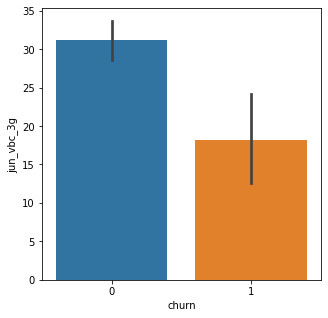

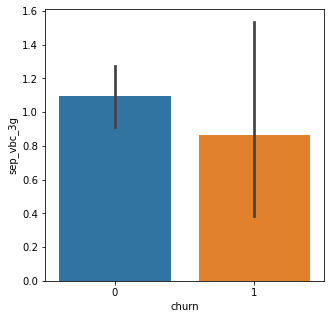

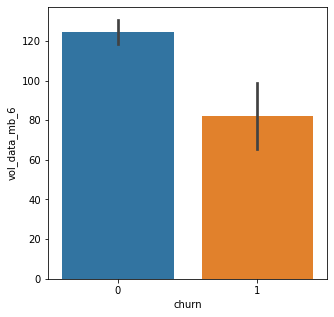

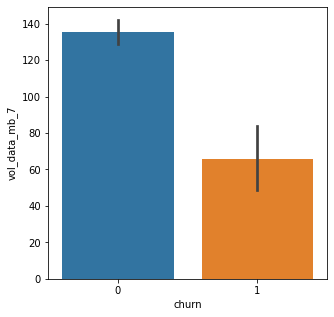

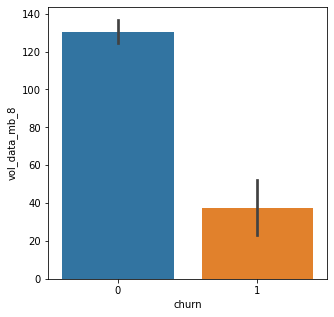

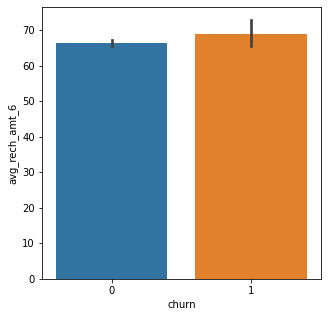

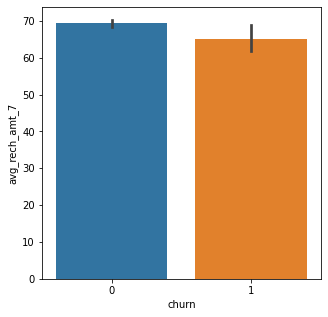

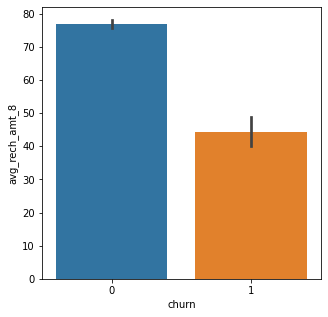

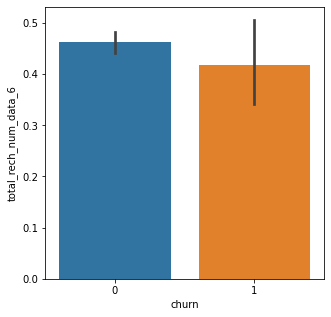

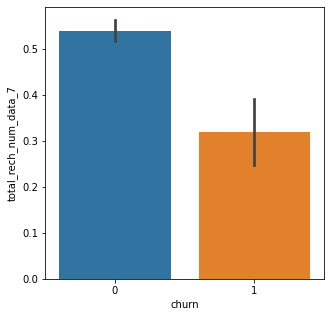

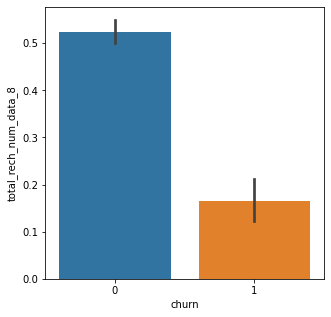

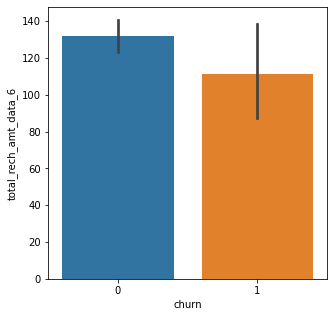

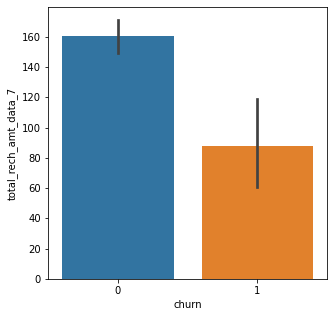

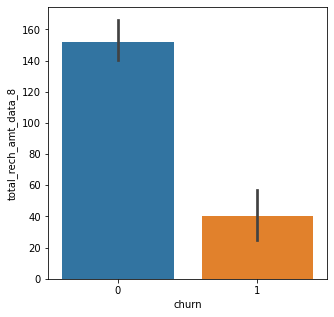

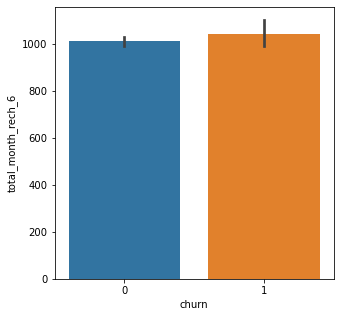

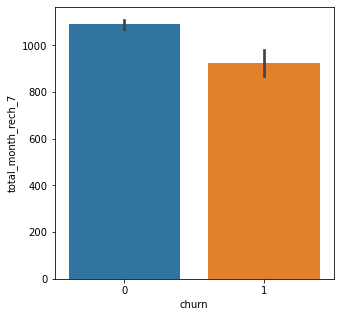

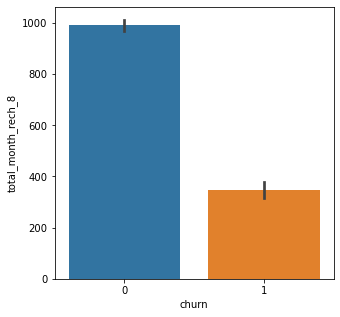

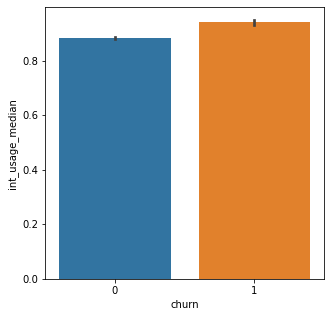

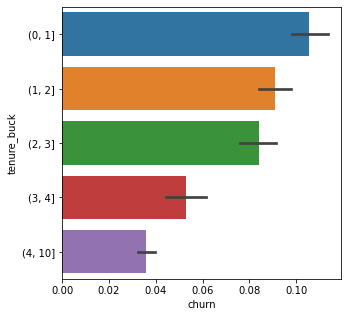

In [73]:
cont_cols = [col for col in hv_users.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=hv_users)
    plt.show()

**The graph above displays the statistical relationship between "churn" and each of the other predictor variables.**

In [74]:
hv_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 0 to 29905
Columns: 150 entries, mobile_number to tenure_buck
dtypes: category(1), float64(118), int32(3), int64(28)
memory usage: 34.4 MB


In [75]:
#Let's create dummy variable for "tenure_buck"

hv_users = pd.get_dummies(hv_users, drop_first=True)
hv_users.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                  "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

## Model Building

- Splitting data into test-train
- Scaling values
- Building model

In [76]:
# creating copy of the final highv_user dataframe
df = hv_users.copy()
# removing the columns not required for modeling
df.drop(['mobile_number'], axis=1, inplace=True)

In [77]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df.drop(['churn'], axis=1)

#putting response variables in Y
y = df['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [78]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20466, 151)
Number transactions y_train dataset:  (20466,)
Number transactions X_test dataset:  (8772, 151)
Number transactions y_test dataset:  (8772,)


In [79]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### Let's handle class imbalance.

In [81]:
print("Before handling the imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Before handling the imbalance, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before handling the imbalance, counts of label '1': 1483
Before handling the imbalance, counts of label '0': 18983 

Before handling the imbalance, churn event rate : 7.25% 



#### As we can see from the example above, there is a significant amount of data imbalance that has to be addressed before using PCA to create a better model.

In [82]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [83]:
print('After handling the imbalance, the shape of train_X: {}'.format(X_train_res.shape))
print('After handling the imbalance, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After handling the imbalance, counts of label '1': {}".format(sum(y_train_res==1)))
print("After handling the imbalance, counts of label '0': {}".format(sum(y_train_res==0)))
print("After handling the imbalance, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After handling the imbalance, the shape of train_X: (37966, 151)
After handling the imbalance, the shape of train_y: (37966,) 

After handling the imbalance, counts of label '1': 18983
After handling the imbalance, counts of label '0': 18983
After handling the imbalance, churn event rate : 50.0% 



In [84]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [85]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(random_state=42, svd_solver='randomized')

In [86]:
pca.explained_variance_ratio_[:50]

array([0.0828115 , 0.0698877 , 0.05404438, 0.03767222, 0.03001071,
       0.02892705, 0.0282031 , 0.02565048, 0.02367346, 0.02197515,
       0.01812511, 0.01702976, 0.01657724, 0.0162258 , 0.01555039,
       0.01390396, 0.01301349, 0.01292724, 0.01267095, 0.01187883,
       0.01184292, 0.011593  , 0.01105858, 0.01050276, 0.01017117,
       0.0100365 , 0.0091925 , 0.00898403, 0.00890183, 0.00849348,
       0.00843543, 0.00816017, 0.0079358 , 0.00788559, 0.00785633,
       0.00739962, 0.00722887, 0.0071293 , 0.00711582, 0.00704183,
       0.00695625, 0.00691386, 0.00686831, 0.00674727, 0.00647   ,
       0.00646497, 0.00642391, 0.00606122, 0.00600318, 0.00577717])

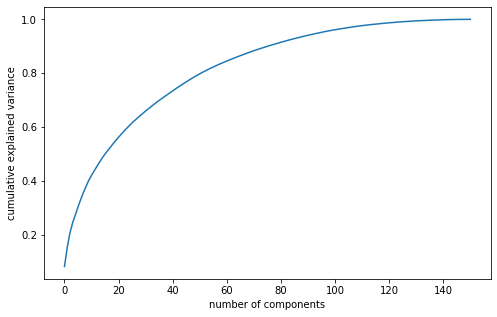

In [87]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**As we can see, 80 components can account for 90% of the variance.**

In [88]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=80)

In [89]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(37966, 80)

In [90]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.03270483143705932 , min corr:  -0.01981365424664477


**OBSERVATION:** As can be seen, there is almost no link between the two components. Our data was successfully cleaned of multicollinearity, and as a result, our models will be significantly more reliable.

In [91]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8772, 80)

### We will fit a range of models for the prediction of customer turnover and choose the one that is the best predictor. trained models include,
    1. Logistic Regression with PCA
    2. Random Forest with PCA 

# 1. Logistic Regression

Let's apply Logistic Regression on our PCA components


In [92]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca, y_train_res)

In [93]:
#Making predictions on test data


pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.81'

In [94]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(X_test_pca)
y_pred_default = model_pca.predict(X_test_pca)

In [95]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [96]:
# print(classification_report(y_test,y_pred_default))

print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6097 2045]
 [ 158  472]]
0.748860009119927


In [97]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})


In [98]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8056039037247585


## Let's plot ROC curve

In [99]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

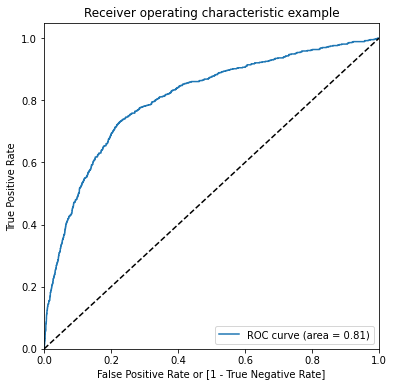

(array([0.00000000e+00, 1.22819946e-04, 1.22819946e-04, ...,
        9.99754360e-01, 9.99877180e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0015873, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99912977e+00, 9.99129775e-01, 9.98438424e-01, ...,
        1.20964468e-09, 1.82370575e-12, 1.22525795e-27]))

In [100]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.567305,1,1,1,1,1,1,0,0,0,0
1,0,0.067814,1,0,0,0,0,0,0,0,0,0
2,0,0.609809,1,1,1,1,1,1,1,0,0,0
3,0,0.060223,1,0,0,0,0,0,0,0,0,0
4,0,0.029076,1,0,0,0,0,0,0,0,0,0


***Let's calculate accuracy sensitivity and specificity for various probability cutoffs.***

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.071819  0.000000  1.000000
0.1   0.1  0.340971  0.294891  0.936508
0.2   0.2  0.474350  0.441415  0.900000
0.3   0.3  0.580255  0.558585  0.860317
0.4   0.4  0.668947  0.658315  0.806349
0.5   0.5  0.748860  0.748833  0.749206
0.6   0.6  0.815435  0.829157  0.638095
0.7   0.7  0.869129  0.897937  0.496825
0.8   0.8  0.905267  0.949767  0.330159
0.9   0.9  0.926585  0.987104  0.144444


<AxesSubplot:xlabel='prob'>

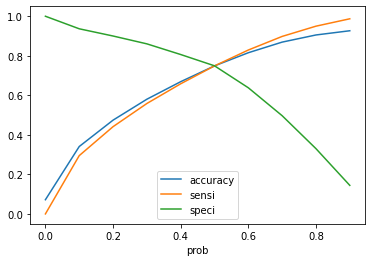

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [104]:
## Finidng the optimal cutoff

import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [105]:
# Let's create new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8142
1     630
Name: churn, dtype: int64

### Confusion Matrix

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6022, 2120],
       [ 154,  476]], dtype=int64)

### Metrics of the Logistic Regression Model on PCA

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.748860009119927
Sensitivity:  0.7555555555555555
Specificity:  0.7396217145664455
false postive rate:  0.2603782854335544
positive predictive value:  0.18335901386748846
Negative predictive value:  0.9750647668393783
Misclassification Rate:  0.259233926128591


# 2. RandomForest with PCA

In [108]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_pca,y_train_res)

# Making predictions
y_pred_default = rfc.predict(X_test_pca)

In [109]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7720,  422],
       [ 447,  183]], dtype=int64)

In [110]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.2904761904761905
Specificity:  0.9481699828052076
false postive rate:  0.05183001719479243
positive predictive value:  0.30247933884297523
Negative predictive value:  0.945267540100404
Misclassification Rate:  0.09906520747834018


### Hyperparameter tuning for RandomForest

In [111]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 21, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier()


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf_with_pca.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 21, 5)}, return_train_score=True,
             scoring='accuracy')

In [112]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.635721,0.176081,0.172191,0.030753,1,{'max_depth': 1},0.713326,0.709733,0.709864,0.734229,...,0.718143,0.009493,4,0.731397,0.717677,0.709841,0.734600,0.713463,0.721396,0.009845
1,29.155580,0.813492,0.176664,0.023238,6,{'max_depth': 6},0.793916,0.802713,0.808771,0.809693,...,0.804957,0.006105,3,0.817859,0.820334,0.821881,0.819478,0.812333,0.818377,0.003290
2,43.353505,0.494566,0.234192,0.009899,11,{'max_depth': 11},0.902950,0.902278,0.894772,0.901620,...,0.901860,0.004136,2,0.947978,0.943338,0.946499,0.948573,0.948276,0.946933,0.001934
3,54.192392,2.610601,0.301499,0.058905,16,{'max_depth': 16},0.940611,0.939418,0.935599,0.938628,...,0.939525,0.002537,1,0.986929,0.987917,0.987357,0.988608,0.986797,0.987522,0.000669


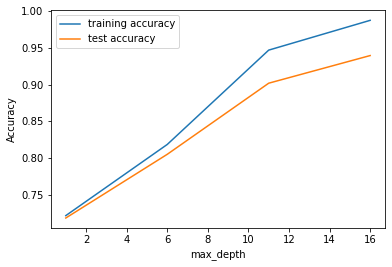

In [113]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [114]:
# Tuning n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 250, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=11)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True )
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=11), n_jobs=-1,
             param_grid={'n_estimators': range(50, 250, 50)},
             return_train_score=True, scoring='accuracy')

In [115]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.936870,0.592367,0.225840,0.042498,50,{'n_estimators': 50},0.903081,0.900040,0.895035,0.899644,...,0.900780,0.003699,4,0.944982,0.945675,0.942679,0.948013,0.944852,0.945240,0.001712
1,46.453145,1.562982,0.246852,0.024840,100,{'n_estimators': 100},0.904003,0.901883,0.897142,0.901225,...,0.902808,0.004137,2,0.946925,0.945346,0.947684,0.948474,0.945610,0.946808,0.001194
2,74.122164,1.202993,0.417877,0.061271,150,{'n_estimators': 150},0.902555,0.902147,0.896747,0.900435,...,0.902386,0.004345,3,0.946596,0.948474,0.948178,0.948211,0.947519,0.947795,0.000677
3,76.896961,10.593733,0.291105,0.053741,200,{'n_estimators': 200},0.902950,0.903200,0.899249,0.901620,...,0.903782,0.004290,1,0.947814,0.947025,0.947585,0.948803,0.948079,0.947861,0.000585


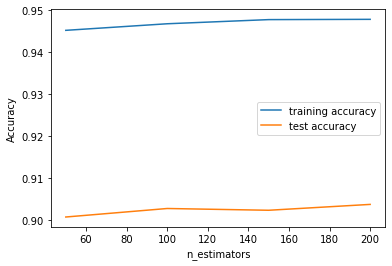

In [116]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [117]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,  scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20]},
             return_train_score=True, scoring='accuracy')

In [118]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,20.267417,0.191777,0.221610,0.008991,4,{'max_features': 4},0.875296,0.876992,0.872909,0.878046,...,0.878418,0.005495,4,0.920354,0.916044,0.920061,0.916406,0.918052,0.918183,0.001788
1,39.814221,0.814391,0.248635,0.034561,8,{'max_features': 8},0.884119,0.884631,0.880943,0.885684,...,0.885582,0.003818,3,0.928421,0.927929,0.928489,0.929312,0.927040,0.928238,0.000746
2,69.559816,1.621157,0.214520,0.007910,14,{'max_features': 14},0.889518,0.885289,0.884762,0.888977,...,0.888716,0.003688,2,0.933261,0.929641,0.933164,0.935897,0.932901,0.932973,0.001989
3,76.291989,8.708964,0.152510,0.027784,20,{'max_features': 20},0.890176,0.886079,0.886474,0.888186,...,0.889770,0.004331,1,0.937080,0.932802,0.936358,0.935140,0.935765,0.935429,0.001462


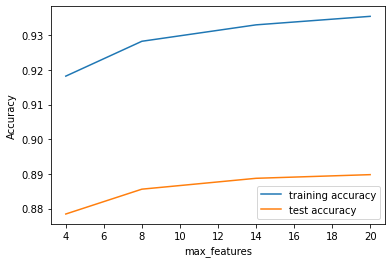

In [119]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [120]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 250, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(100, 250, 50)},
             return_train_score=True, scoring='accuracy')

In [121]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,34.543154,0.590295,0.221176,0.047936,100,{'min_samples_leaf': 100},0.804978,0.817200,0.819439,0.820229,...,0.818127,0.007663,1,0.839885,0.838640,0.836763,0.837915,0.834557,0.837552,0.001808
1,31.389810,0.800773,0.174666,0.025636,150,{'min_samples_leaf': 150},0.792468,0.802186,0.809957,0.807849,...,0.806643,0.009300,2,0.822336,0.821223,0.821157,0.822540,0.820894,0.821630,0.000672
2,28.771682,0.365526,0.135448,0.016283,200,{'min_samples_leaf': 200},0.787200,0.798499,0.802318,0.802186,...,0.799821,0.007146,3,0.815093,0.813222,0.811807,0.811642,0.808547,0.812062,0.002151


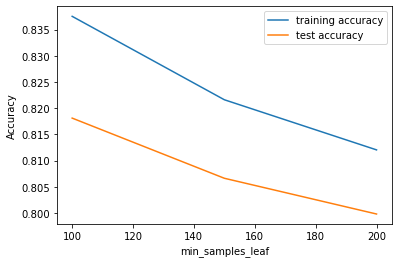

In [122]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(150, 350, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train_pca, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(150, 350, 50)},
             return_train_score=True, scoring='accuracy')

In [124]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,45.285342,0.701580,0.235102,0.008343,150,{'min_samples_split': 150},0.841190,0.854735,0.859212,0.855920,...,0.855950,0.008859,1,0.896780,0.895664,0.894610,0.894709,0.895532,0.895459,0.000784
1,47.153021,4.177989,0.221147,0.003727,200,{'min_samples_split': 200},0.829734,0.841433,0.845516,0.843013,...,0.842254,0.007148,2,0.876992,0.876502,0.877918,0.874625,0.870740,0.875356,0.002545
2,50.889208,0.865837,0.235180,0.034155,250,{'min_samples_split': 250},0.820911,0.831292,0.836297,0.838799,...,0.834905,0.008693,3,0.864415,0.861094,0.861653,0.862674,0.858723,0.861712,0.001873
3,37.285043,5.600970,0.203932,0.020282,300,{'min_samples_split': 300},0.814590,0.821546,0.830370,0.827736,...,0.826003,0.007315,4,0.852101,0.850657,0.850723,0.851743,0.845685,0.850182,0.002318


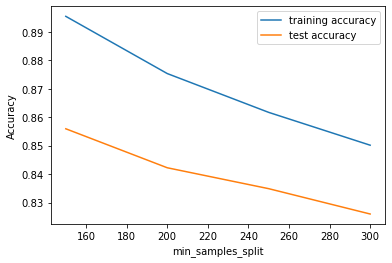

In [125]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [126]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 300, 100),
    'n_estimators': range(200, 300, 100), 
    'max_features': [8, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,cv = 5, n_jobs=-1, verbose = 1,return_train_score=True )
grid_search.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 300, 100),
                         'n_estimators': range(200, 300, 100)},
             refit='recall_score', return_train_score=True, verbose=1)

In [127]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8188645364246577 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [128]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=10,min_samples_leaf=100, min_samples_split=200, 
                             max_features=10, n_estimators=200)

In [129]:
# fit
rfc.fit(X_train_pca, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

In [130]:
# predict
y_pred_default = rfc.predict(X_test_pca)

In [131]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8142
           1       0.22      0.64      0.32       630

    accuracy                           0.81      8772
   macro avg       0.59      0.73      0.61      8772
weighted avg       0.91      0.81      0.85      8772

[[6683 1459]
 [ 226  404]]
accuracy_score:   0.8079115367077063


In [132]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[6683, 1459],
       [ 226,  404]], dtype=int64)

### Statistical metrics for Random Forest

In [133]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8079115367077063
Sensitivity:  0.6412698412698413
Specificity:  0.8208056988454925
false postive rate:  0.1791943011545075
positive predictive value:  0.2168545356951154
Negative predictive value:  0.9672890432768853
Misclassification Rate:  0.19208846329229365


### Recomendation for Model Selection

**For this particular dataset, utilising PCA, the results of the customer churn analysis showed that Logistic Regression outperformed Decision Tree. As Logistic Regression has a higher sensitivity and better specificity score, we may be able to forecast prospective client attrition.**

- With 75% Sensitivity, LogisticRegression is the best model.
- RandomForest's sensitivity is significantly lower, at 64%.

#### LogisticRegression with PCA 
- Accuracy Score on test data:  0.7462380300957593
- Sensitivity:  0.7507936507936508
- Specificity:  0.7377794153770573
- false postive rate:  0.2622205846229428
- positive predictive value:  0.18136503067484663
- Negative predictive value:  0.9745295262816352
- Misclassification Rate:  0.2612859097127223

#### RandomForest with PCA
- Accuracy Score:   0.8111035111719106
- Sensitivity:  0.6412698412698413
- Specificity:  0.8242446573323507
- false postive rate:  0.17575534266764922
- positive predictive value:  0.22016348773841962
- Negative predictive value:  0.9674210753928211
- Misclassification Rate:  0.18889648882808938

### **Therefore, the best model in this situation for forecasting customer attrition is logistic regression with PCA.**

# Random Forest for features of the churn driver (using imbalance treated data)
  - We will fit the Random Forest model we created above to the dataset we obtained after managing the data imbalance in order to obtain the significant predictors.

In [134]:
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200)

<AxesSubplot:>

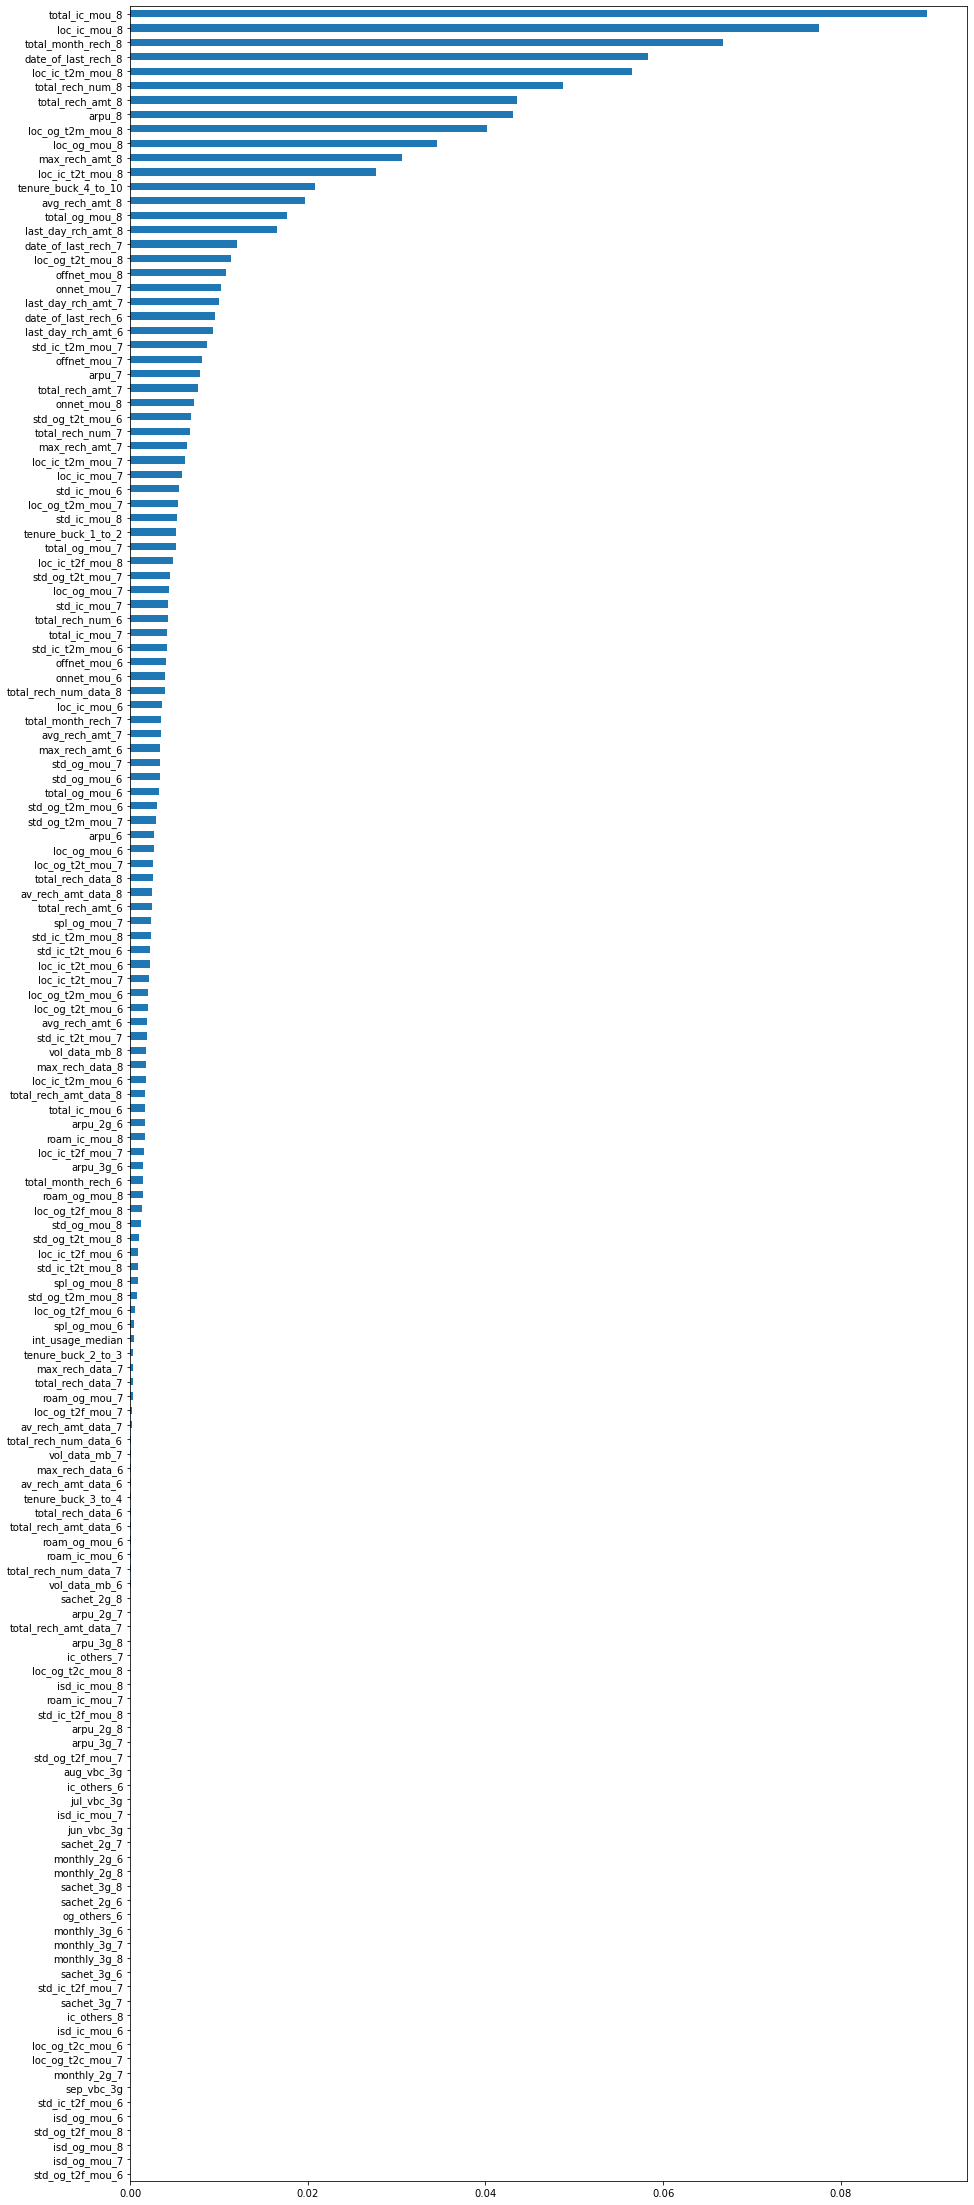

In [135]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

# Observation:

The graph above indicates that the top characteristics are those that are predominantly associated with month 8, or the action month, as determined by our RandomForest implementation.

Therefore, it is clear that the action phase's activities have a direct bearing on the loss of high-value clients. These characteristics are specifically as follows:



1.	**total_ic_mou_8**		-- *Total incoming minutes of usage in month 8*
2.	**loc_ic_mou_8**		-- *local incoming minutes of usage in month 8*
3.	**total_month_rech_8**	-- *Total month recharge amount in month 8*	
4.	**date_of_last_rech_8**	-- *Last date of recharge in the month 8*
5.	**loc_ic_t2m_mou_8**	-- *local incoming calls to another operator minutes of usage in month 8*
6.	**max_rech_amt_8**		-- *maximum recharge amount in month 8*
7.	**arpu_8**				-- *average revenue per user in month 8*
8.	**total_rech_num_8**	-- *total number of recharges done in the month 8*
9.	**loc_og_mou_8**		-- *local outgoing calls minutes of usage in month 8*
10.	**total_rech_amt_8**	-- *total recharge amount in month 8*
11.	**loc_ic_t2t_mou_8**	-- *local incoming calls from same operator minutes of usage in month 8*
12.	**avg_rech_amt_8**		-- *average recharge amount in month 8*
13.	**tenure_buck_4_to_10**		-- *tenure of the customer using the operator T network*
14.	**loc_og_t2n_mou_8**	-- *local outgoing calls minutes of usage to other operator mobile in month 8*
15.	**last_day_rch_amt_8**	-- *last (most recent) recharge amount in month 8*
16.     **offnet_mou_8**        -- *All kind of voice calls(minutes of usage) outside the operator T network in month 8*
17.	**date_of_last_rech_7**	-- *Last date of recharge in the month 7*
18.	**total_og_mou_8**      -- *total number of outgoing calls in month 8*
19.     **onnet_mou_7**        -- *All kind of voice calls within the same operator network in month 7*
20.	**loc_oc_t2t_mou_8**	-- *local outgoing calls from same operator minutes of usage in month 8*

For predicting attrition, "Total Monthly Calls & Local Calls Mou" for incoming or outgoing calls is crucial. A decrease in these characteristics is an obvious sign of churn.

In general, a decrease in any of these features indicates that the customer is not actively using the telecom operator's services and may soon decide to churn.

Let's examine some business measures that can be made to keep these anticipated churners.

## Business steps to manage the customer churn

Given that it is more expensive to maintain an existing customer than to acquire a new one, customer retention is now even more crucial than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

### Supervising any Drop in usage

Drop in utilisation makes it possible to estimate customer attrition well.

In addition to employing the machine learning model for churn prediction, the telecom operator should closely monitor monthly changes in MoU, ARPU, and data consumption (2g and 3g). The business should monitor these figures on a weekly basis, if practical.

Because monthly billing cycles are normal, a decline in consumption numbers will give the business time to take preventative action when monitored at the weekly level.

In order to learn what is affecting these consumers' experiences, the company should get in touch with them very away. Offer them discounts or other inducements to keep using the services while the business resolves the reported problems.

Additionally, the marketing team should take the initiative to develop campaigns that specifically target these high-value potential churners with the best deals possible.